
# Customer Segmentation using Clustering

## Introduction  
Customer segmentation is the practice of dividing customers into distinct groups based on shared characteristics.  
In this project, we aim to segment mall customers based on features like **Age**, **Annual Income**, and **Spending Score**.  

This helps businesses to:  
- Understand customer behavior  
- Improve marketing strategies  
- Provide personalized recommendations  
- Optimize customer satisfaction and business growth  



### Step 1: Importing Libraries  
We begin by importing necessary Python libraries for data handling, visualization, and clustering algorithms.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import joblib
import warnings
warnings.filterwarnings('ignore')


### Step 2: Importing the Dataset  
We load the dataset containing mall customer details. The main features are:  
- **CustomerID** – Unique identifier  
- **Gender** – Male or Female  
- **Age** – Age of the customer  
- **Annual Income (k$)** – Income level  
- **Spending Score (1-100)** – Spending behavior assigned by the mall  


In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


### Step 3: Data Preprocessing  
Before applying clustering, we check the dataset for:  
- Missing values  
- Data distribution  
- Feature scaling (standardization for clustering algorithms)  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
display(df.describe())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

## Step 3: Exploratory Data Analysis

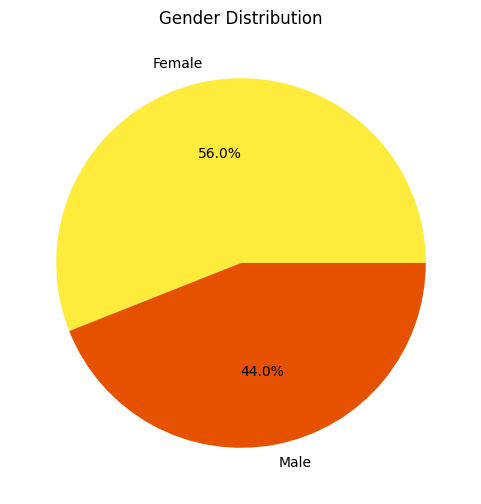

In [8]:
plt.figure(figsize=(6,6))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
        colors=['#FFEB3B', '#E65100'])
plt.title('Gender Distribution')
plt.show()

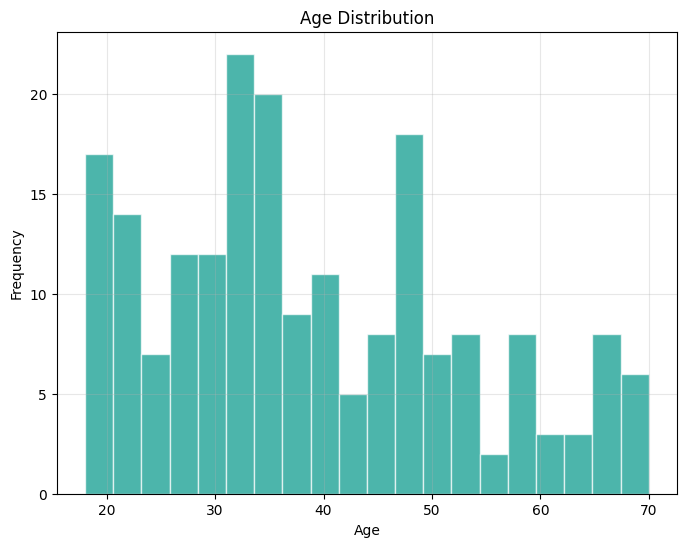

In [9]:
plt.figure(figsize=(8,6))
plt.hist(df['Age'], bins=20, alpha=0.7, color='#009688', edgecolor='white')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

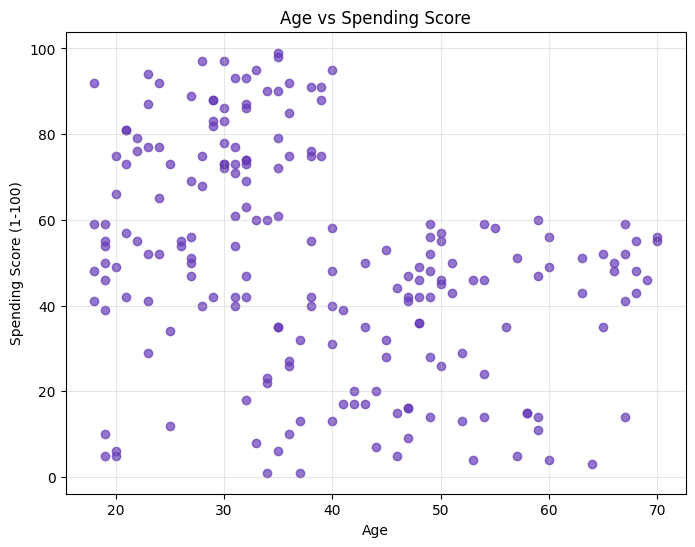

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], alpha=0.7, color='#673AB7')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score')
plt.grid(True, alpha=0.3)
plt.show()

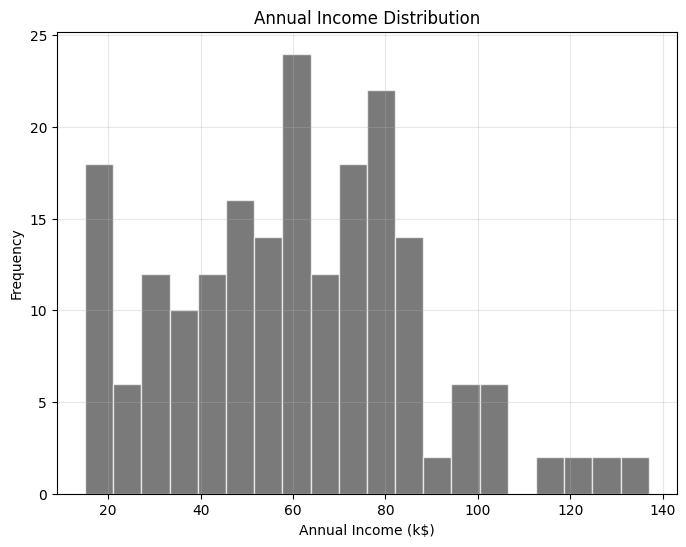

In [11]:
plt.figure(figsize=(8,6))
plt.hist(df['Annual Income (k$)'], bins=20, alpha=0.7, color='#424242', edgecolor='White')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

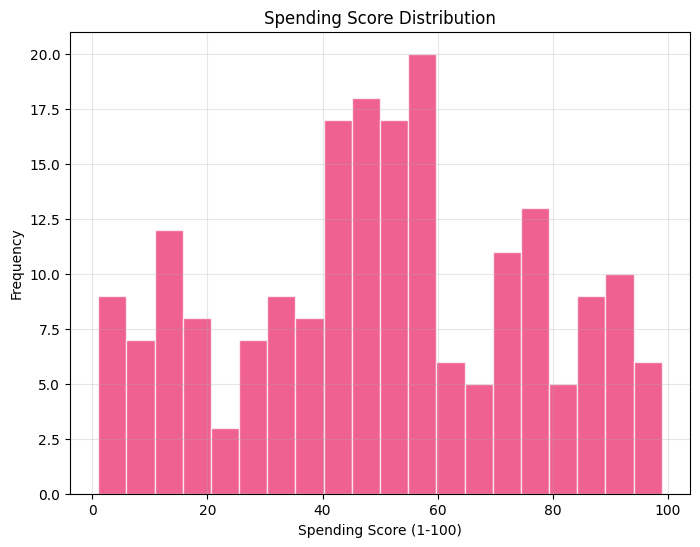

In [12]:
plt.figure(figsize=(8,6))
plt.hist(df['Spending Score (1-100)'], bins=20, alpha=0.7, color='#E91E63', edgecolor = "white")
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

## Step 4: Data Preprocessing

In [13]:
clustering_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[clustering_features].copy()


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nScaled features ")
for i, col in enumerate(clustering_features):
    print(f"   {col}: {X_scaled[:, i].min():.2f} - {X_scaled[:, i].max():.2f}")



Scaled features 
   Annual Income (k$): -1.74 - 2.92
   Spending Score (1-100): -1.91 - 1.89


In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range = range(2, 11)
inertias = []
silhouette_scores = []

In [16]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

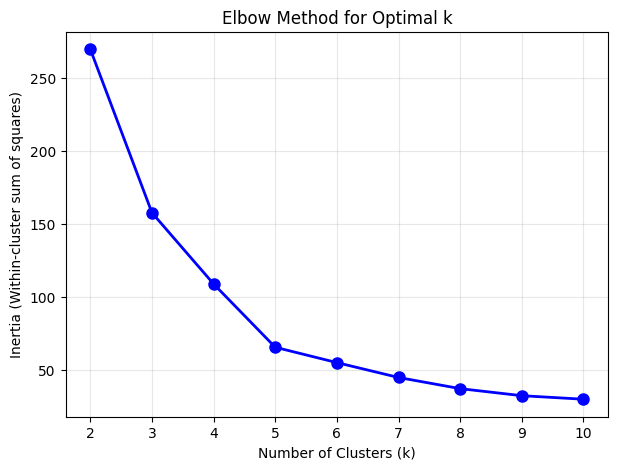

In [17]:
plt.figure(figsize=(7, 5))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)
plt.show()


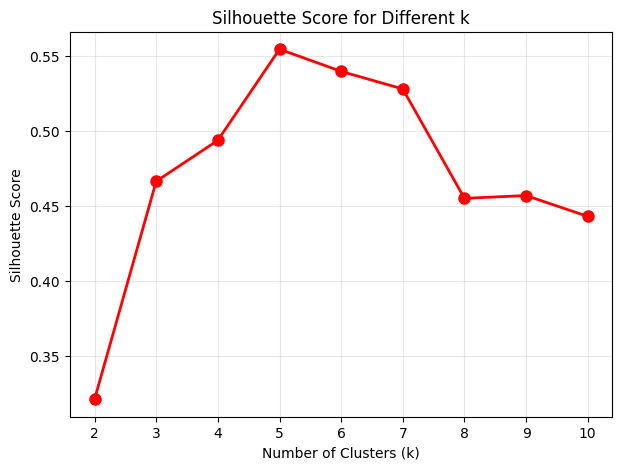

In [18]:
plt.figure(figsize=(7, 5))
plt.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.grid(True, alpha=0.3)
plt.show()


In [19]:
best_k = k_range[np.argmax(silhouette_scores)]
print("Best k:", best_k)
print("Silhouette Score:", max(silhouette_scores))


Best k: 5
Silhouette Score: 0.5546571631111091



## Step 5: Applying Clustering Algorithms  
We apply clustering techniques such as:  
- **K-Means Clustering** – A centroid-based algorithm  
- **DBSCAN** – A density-based clustering method  

These algorithms group customers into segments with similar purchasing patterns.  


In [20]:
optimal_k = 5
print("Using k =", optimal_k)

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)


Using k = 5


In [21]:
df_clustered = df.copy()
df_clustered["Cluster"] = labels

print("Number of clusters:", optimal_k)
print("Silhouette score:", silhouette_score(X_scaled, labels))

print("\nCluster Distribution:")
counts = pd.Series(labels).value_counts().sort_index()
for c, n in counts.items():
    pct = n / len(labels) * 100
    print("Cluster", c, ":", n, "samples (", round(pct, 1), "% )")

Number of clusters: 5
Silhouette score: 0.5546571631111091

Cluster Distribution:
Cluster 0 : 81 samples ( 40.5 % )
Cluster 1 : 39 samples ( 19.5 % )
Cluster 2 : 22 samples ( 11.0 % )
Cluster 3 : 35 samples ( 17.5 % )
Cluster 4 : 23 samples ( 11.5 % )


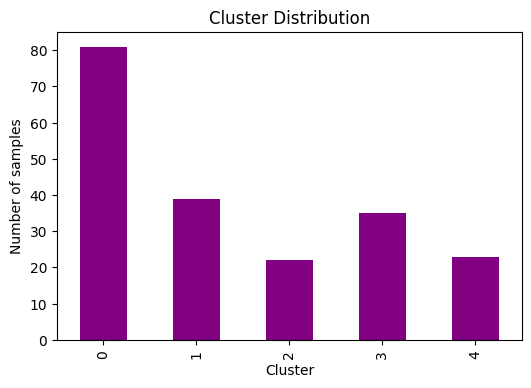

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
counts.plot(kind="bar", color = "Purple")
plt.xlabel("Cluster")
plt.ylabel("Number of samples")
plt.title("Cluster Distribution")
plt.show()


In [23]:
cluster_profiles = {}
for cluster in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster]
    cluster_profiles[cluster] = {
        'size': len(cluster_data),
        'avg_age': cluster_data['Age'].mean(),
        'avg_income': cluster_data['Annual Income (k$)'].mean(),
        'avg_spending': cluster_data['Spending Score (1-100)'].mean(),
        'dominant_gender': cluster_data['Gender'].mode()[0]
    }

for cluster, profile in cluster_profiles.items():
    print(f"Cluster {cluster}: {profile['size']} customers")
    print(f"  Avg Age: {profile['avg_age']:.1f}")
    print(f"  Avg Income: {profile['avg_income']:.1f}k$")
    print(f"  Avg Spending: {profile['avg_spending']:.1f}")
    print(f"  Dominant Gender: {profile['dominant_gender']}\n")

Cluster 0: 81 customers
  Avg Age: 42.7
  Avg Income: 55.3k$
  Avg Spending: 49.5
  Dominant Gender: Female

Cluster 1: 39 customers
  Avg Age: 32.7
  Avg Income: 86.5k$
  Avg Spending: 82.1
  Dominant Gender: Female

Cluster 2: 22 customers
  Avg Age: 25.3
  Avg Income: 25.7k$
  Avg Spending: 79.4
  Dominant Gender: Female

Cluster 3: 35 customers
  Avg Age: 41.1
  Avg Income: 88.2k$
  Avg Spending: 17.1
  Dominant Gender: Male

Cluster 4: 23 customers
  Avg Age: 45.2
  Avg Income: 26.3k$
  Avg Spending: 20.9
  Dominant Gender: Female



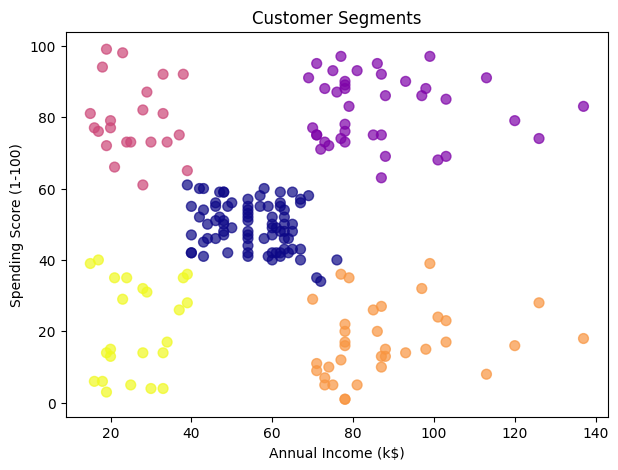

In [24]:
plt.figure(figsize=(7,5))
plt.scatter(df_clustered['Annual Income (k$)'],
            df_clustered['Spending Score (1-100)'],
            c=df_clustered['Cluster'], cmap='plasma', alpha=0.7, s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments")
plt.show()

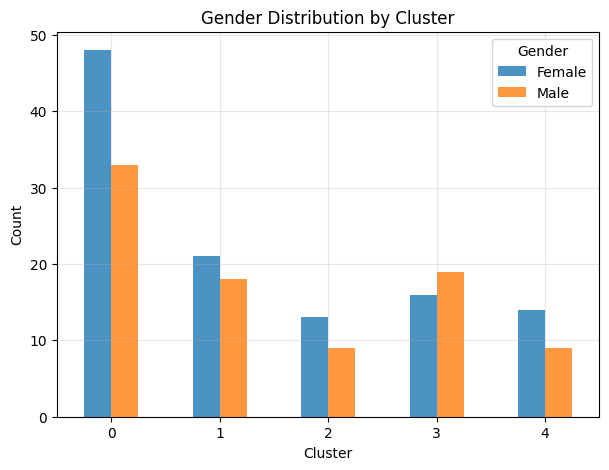

In [25]:
plt.figure(figsize=(7, 5))
df_clustered.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0) \
    .plot(kind='bar', ax=plt.gca(), alpha=0.8)

plt.title("Gender Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.grid(alpha=0.3)
plt.show()


In [26]:
import plotly.express as px

fig = px.scatter_3d(
    df_clustered,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    z='Age',
    color='Cluster',
    hover_data=['CustomerID'],   # optional: add extra info on hover
    opacity=0.7
)

fig.update_layout(
    title='3D Customer Clusters',
    scene=dict(
        xaxis_title='Annual Income (k$)',
        yaxis_title='Spending Score (1-100)',
        zaxis_title='Age'
    )
)

fig.show()


In [27]:
# DBSCAN Clustering
eps_values = [0.3, 0.5, 0.7, 1.0]
best_dbscan, best_score, best_eps = None, -1, None

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    if len(set(labels)) > 1:  # Ignore all-noise case
        score = silhouette_score(X_scaled, labels)
        if score > best_score:
            best_score, best_dbscan, best_eps = score, dbscan, eps

# Apply best DBSCAN
dbscan_labels = best_dbscan.fit_predict(X_scaled)
df_dbscan = df.copy()
df_dbscan['Cluster'] = dbscan_labels


## Step 6: Visualization of Clusters  
We visualize customer clusters using scatter plots to observe how groups are formed based on **Annual Income** and **Spending Score**.  


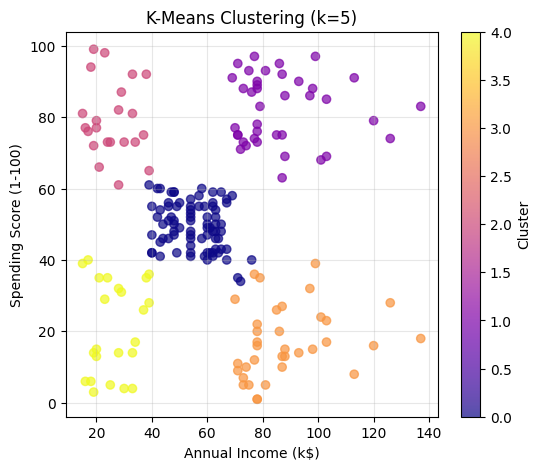

In [28]:
# K-Means clustering plot
plt.figure(figsize=(6, 5))
plt.scatter(df_clustered['Annual Income (k$)'],
            df_clustered['Spending Score (1-100)'],
            c=df_clustered['Cluster'], cmap='plasma', alpha=0.7)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.colorbar(label="Cluster")
plt.grid(True, alpha=0.3)
plt.show()

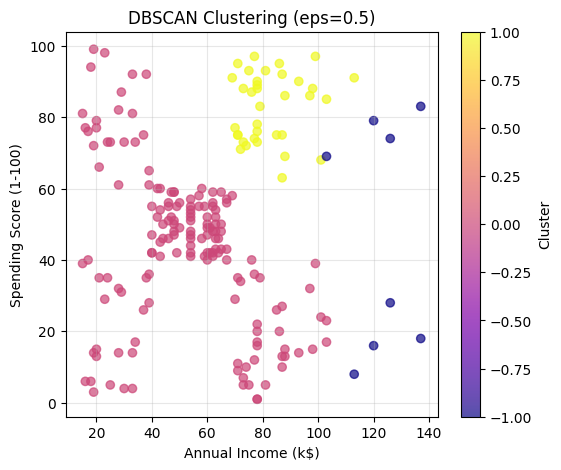

In [29]:
# DBSCAN clustering plot
plt.figure(figsize=(6, 5))
plt.scatter(df_dbscan['Annual Income (k$)'],
            df_dbscan['Spending Score (1-100)'],
            c=df_dbscan['Cluster'], cmap='plasma', alpha=0.7)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'DBSCAN Clustering (eps={best_eps})')
plt.colorbar(label="Cluster")
plt.grid(True, alpha=0.3)
plt.show()


# Conclusion and Key Takeaways  

- Customer segmentation allows businesses to better understand their customer base.  
- Using clustering, we identified distinct customer groups based on **Age**, **Income**, and **Spending Score**.  
- **K-Means** provided well-defined clusters, while **DBSCAN** helped in identifying noise and outliers.  
- Visualizations clearly showed different customer behaviors and preferences.  

### Key Takeaways  
- Clustering is a powerful unsupervised learning technique for market segmentation.  
- Preprocessing (like scaling) plays a crucial role in clustering accuracy.  
- Businesses can use these insights to design **targeted marketing strategies** and improve **customer experience**.  
